In [1]:
from utils.metrics import Metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
import random

/Users/aaronlalala/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aaronlalala/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [21]:
def read_symbol(symbol):
    df = pd.read_csv(f"data/{symbol}/{symbol}.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    return df.sort_values(by="Date")

In [22]:
def plot_symbol(date, value):
    plt.figure(figsize=(18, 10))
    plt.plot(date.values, value.values)

    # Adding title and labels
    plt.title('Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')

    # Display plot
    plt.grid(True)
    plt.show()

In [23]:
symbol = "IWY"
df = read_symbol(symbol)

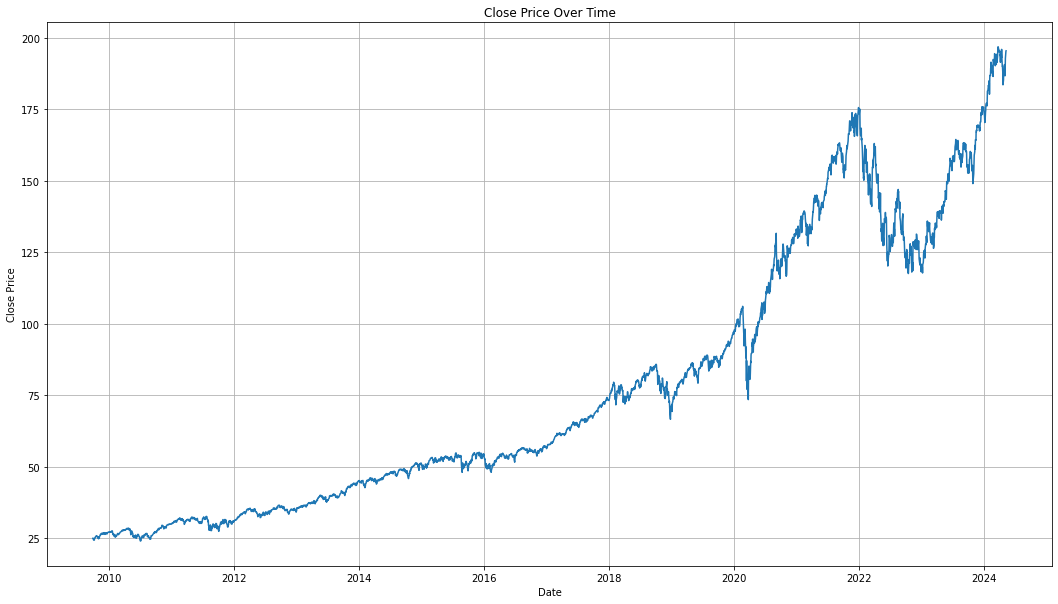

In [24]:
plot_symbol(df["Date"], df["Close"])

In [25]:
def print_metrics(df):
    print(f"Sharpe Ratio is: {Metrics.sharpe(df['Close'])}")
    print(f"Annualized return is {Metrics.annualized_return(df[df['Date'] > '2008-09-01']['Close'].values)}")

In [27]:
print_metrics(df)

Sharpe Ratio is: 0.0536
Number of years: 14.591269841269842.
Total return is 7.824259407526021.
Annualized return is 0.15141360352378608


In [37]:
df["IBS"] = (df["Close"] - df["Low"]) / (df["High"] - df["Low"])

In [42]:
df['Percentile_10'] = df['IBS'].rolling(window=252, min_periods=1).apply(lambda x: np.percentile(x, 5))
df['Percentile_90'] = df['IBS'].rolling(window=252, min_periods=1).apply(lambda x: np.percentile(x, 95))


In [43]:
# Generate buy and sell signals based on rolling percentiles
df['Buy_Signal'] = np.where(df["IBS"] < df['Percentile_10'], df["Close"], np.nan)
df['Sell_Signal'] = np.where(df["IBS"] > df['Percentile_90'], df["Close"], np.nan)
